<a href="https://colab.research.google.com/github/DeniseKelley/ML/blob/main/Final_project_yfinance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Download the data using yfinance

model source 
Prashant Sharma — October 13, 2021 
https://www.analyticsvidhya.com/blog/2021/10/machine-learning-for-stock-market-prediction-with-step-by-step-implementation/

In [2]:
!pip install yfinance

     |████████████████████████████████| 6.4 MB 6.7 MB/s 
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
import yfinance as yf

# Facebook upload the data
fb = yf.Ticker('FB')
#put the values in histogram
hist = fb.history(period="max", auto_adjust=True)
#print histogram
hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2012-05-18,42.049999,45.000000,38.000000,38.230000,573576400,0,0
2012-05-21,36.529999,36.660000,33.000000,34.029999,168192700,0,0
2012-05-22,32.610001,33.590000,30.940001,31.000000,101786600,0,0
2012-05-23,31.370001,32.500000,31.360001,32.000000,73600000,0,0
2012-05-24,32.950001,33.209999,31.770000,33.029999,50237200,0,0
...,...,...,...,...,...,...,...
2021-12-15,332.489990,342.109985,323.980011,341.660004,24681300,0,0
2021-12-16,338.980011,344.459991,333.739990,334.899994,22635000,0,0
2021-12-17,332.799988,337.109985,330.750000,333.790009,39711700,0,0


In [ ]:
#examine the shape of the histogram
print(hist.shape)


(2415, 7)


In [ ]:
import pandas as pd
import numpy as np
df = pd.DataFrame()
#export individual columns from the histogram into DataFrame
df['date'] = hist.index
df['Close'] = hist['Close'].values
#print the values
df.tail()

,date,Close
2410,2021-12-15,341.660004
2411,2021-12-16,334.899994
2412,2021-12-17,333.790009
2413,2021-12-20,325.450012
2414,2021-12-21,332.640015


In [ ]:
#examine the values in the DataFrame for invalid data (Null)
print("Null Value Present: ", df.isnull().values.any())

Null Value Present:  False


Text(0, 0.5, 'Price')

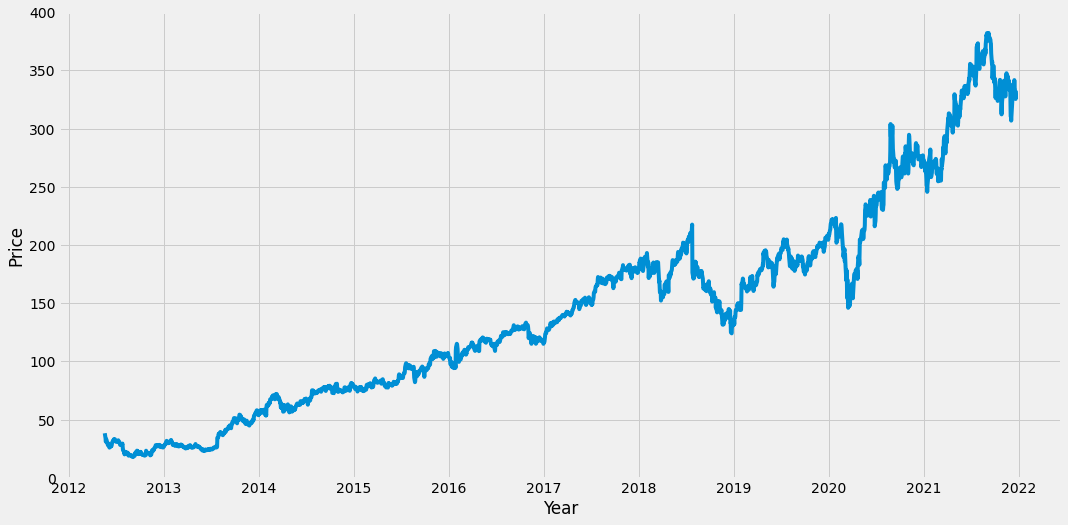

In [ ]:
import matplotlib.pyplot as plt
#plot the original data
plt.figure(figsize=(16,8))
year = hist.index
output_var = hist['Close'].values
output_var=np.array(output_var)
plt.plot(year, output_var)
plt.xlabel("Year")
plt.ylabel("Price")


In [ ]:
from sklearn.preprocessing import MinMaxScaler
#Selecting Features
features = ['Open', 'High', 'Low', 'Volume']
df['Open'] = hist['Open'].values
df['High'] = hist['High'].values
df['Low'] = hist['Low'].values
df['Volume'] = hist['Volume'].values

#scale the stock data to between 0 and 1 to reduce the large numbers input
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(df[features])
feature_transform= pd.DataFrame(columns=features, data=feature_transform, index=df.index)
feature_transform.head()

,Open,High,Low,Volume
0,0.065924,0.073021,0.056607,1.000000
1,0.050743,0.050238,0.042767,0.285873
2,0.039961,0.041851,0.037065,0.168891
3,0.036551,0.038873,0.038227,0.119238
4,0.040897,0.040813,0.039362,0.078082


In [ ]:
#Creating training and test data using TimeSeriesSplit
from sklearn.model_selection import TimeSeriesSplit
timesplit= TimeSeriesSplit(n_splits=10)
for train_index, test_index in timesplit.split(feature_transform):
        X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = output_var[:len(train_index)].ravel(), output_var[len(train_index): (len(train_index)+len(test_index))].ravel()

In [ ]:
#check the shape of the data
print(y_train.shape)
print(y_test.shape)

(2196,)
(219,)


# Building the LSTM model 
We build a Sequential Keras model with one LSTM layer. The LSTM layer has 32 units and is followed by one Dense Layer of one neuron.

We compile the model using Adam Optimizer and the Mean Squared Error as the loss function. 

In [ ]:
#use LSTM model to predict the values. 
#reshape arrays to fit the model
trainX =np.array(X_train)
testX =np.array(X_test)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])

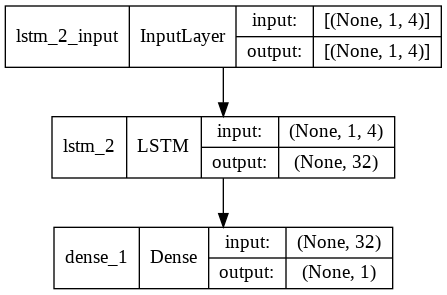

In [ ]:
#Building the LSTM Model
from keras.models import Sequential
from tensorflow.keras import optimizers
from tensorflow.keras import layers
from keras.layers import LSTM
from keras.layers import Dense
from keras.utils.vis_utils import plot_model
#from keras.optimiser import Adam
lstm = Sequential()
lstm.add(LSTM(32, input_shape=(1, trainX.shape[1]), activation='relu', return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
plot_model(lstm, show_shapes=True, show_layer_names=True)

In [ ]:
#Model Training
history=lstm.fit(X_train, y_train, epochs=100, batch_size=8, verbose=1, shuffle=False)

Epoch 1/100
275/275 [==============================] - 2s 2ms/step - loss: 19715.5996 - accuracy: 0.0000e+00
Epoch 2/100
275/275 [==============================] - 1s 3ms/step - loss: 17341.8945 - accuracy: 0.0000e+00
Epoch 3/100
275/275 [==============================] - 1s 2ms/step - loss: 13771.0713 - accuracy: 0.0000e+00
Epoch 4/100
275/275 [==============================] - 1s 2ms/step - loss: 9795.1465 - accuracy: 0.0000e+00
Epoch 5/100
275/275 [==============================] - 1s 3ms/step - loss: 6270.0806 - accuracy: 0.0000e+00
Epoch 6/100
275/275 [==============================] - 1s 3ms/step - loss: 3665.6125 - accuracy: 0.0000e+00
Epoch 7/100
275/275 [==============================] - 1s 2ms/step - loss: 2049.3528 - accuracy: 0.0000e+00
Epoch 8/100
275/275 [==============================] - 1s 2ms/step - loss: 1209.8953 - accuracy: 0.0000e+00
Epoch 9/100
275/275 [==============================] - 1s 3ms/step - loss: 837.0020 - accuracy: 0.0000e+00
Epoch 10/100
275/275 [====

# LSTM Prediction
to forecast the values of the Facebook stock the model uses the LSTM network on the test set. This is accomplished by employing the simple predict function on the LSTM model that has been created.

In [ ]:
#LSTM Prediction
y_pred= lstm.predict(X_test)


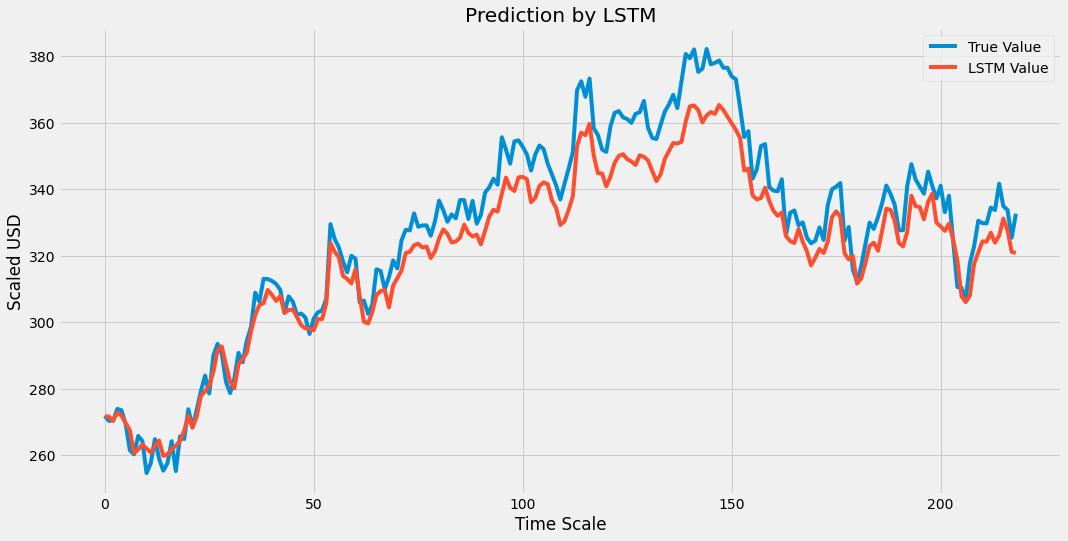

In [ ]:
#Predicted vs True Adj Close Value – LSTM
plt.figure(figsize=(16,8))
plt.plot(y_test, label='True Value')
plt.plot(y_pred, label='LSTM Value')
plt.title('Prediction by LSTM')
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.show()

# Import the data using another data source

In [ ]:
#import the data from another source into dataframe
#
#Computer Science
#https://www.youtube.com/watch?v=QIUxPv5PJOY
import pandas_datareader as web
from pandas_datareader import data as pdr
yf.pdr_override()
#extract the data for a curtain period of time
df = pdr.get_data_yahoo('FB', data_source = 'yahoo', start = '2017-01-01', end='2021-12-17')
df.shape

[*********************100%***********************]  1 of 1 completed


(1249, 6)

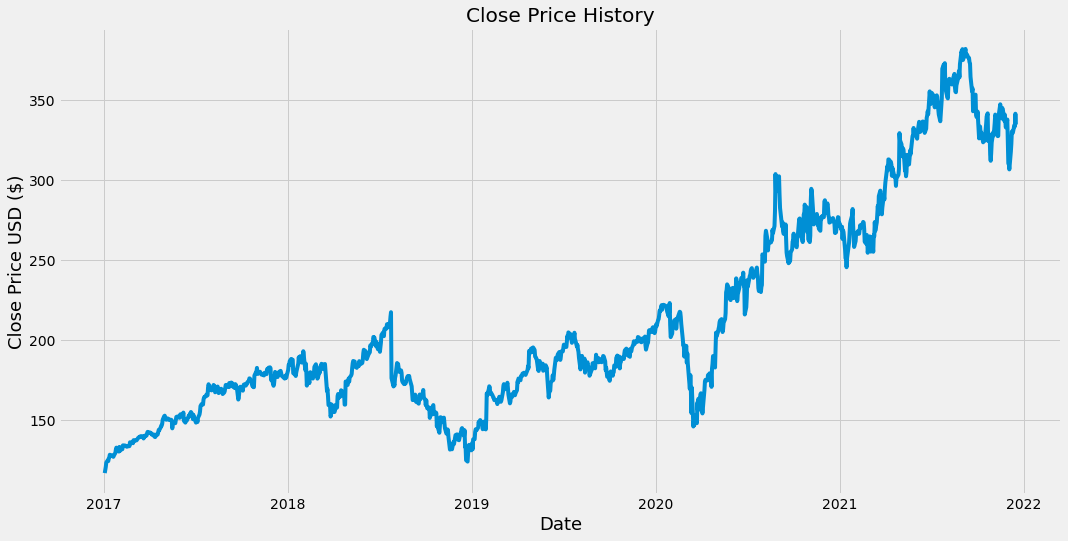

In [ ]:
import math 
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price USD ($)', fontsize = 18)
plt.show()

In [ ]:
#Create a new dataframewith only values for close column
data = df.filter(['Close'])
#convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model
training_data_len = math.ceil(len(dataset)* .8)
training_data_len

1000

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
#scale the data
scaler = MinMaxScaler(feature_range= (0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.        ],
       [0.00689734],
       [0.01436001],
       ...,
       [0.817428  ],
       [0.84727879],
       [0.82180009]])

In [ ]:
#Create the training data set and scaled datata set
train_data = scaled_data[0:training_data_len, :]
#Split the data
x_train = []
y_train = []
for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=60:
    print(x_train)
    print(y_train)
    print()


[array([0.        , 0.00689734, 0.01436001, 0.02468718, 0.03030303,
       0.02823005, 0.03478817, 0.03678578, 0.04326849, 0.04149707,
       0.0416855 , 0.04029098, 0.03836876, 0.04549221, 0.04715059,
       0.05510325, 0.06000301, 0.05774157, 0.05321874, 0.05073122,
       0.06169906, 0.05269108, 0.05321874, 0.0572893 , 0.05646011,
       0.06535503, 0.0651289 , 0.06531736, 0.0647897 , 0.0640359 ,
       0.06249059, 0.06399818, 0.06282979, 0.06354591, 0.07259157,
       0.06972712, 0.07002865, 0.07368462, 0.07040552, 0.07749132,
       0.07500375, 0.07654907, 0.07749132, 0.07703906, 0.07862205,
       0.08058196, 0.08265488, 0.08570785, 0.08465252, 0.08616011,
       0.08717777, 0.08661238, 0.08698931, 0.08159956, 0.08567012,
       0.08544399, 0.0884969 , 0.08842156, 0.09384892, 0.09720335])]
[0.096298823367434]



In [ ]:
#convert the x_train and y_train to numpy array
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
#reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))
x_train.shape

(940, 60, 1)

# Building the LSTM model 
We build a Sequential Keras model with two LSTM layers. The LSTM layer has 50 units and is followed by two Dense Layers of 25 and 1 neuron.

We compile the model using Adam Optimizer and the Mean Squared Error as the loss function. 

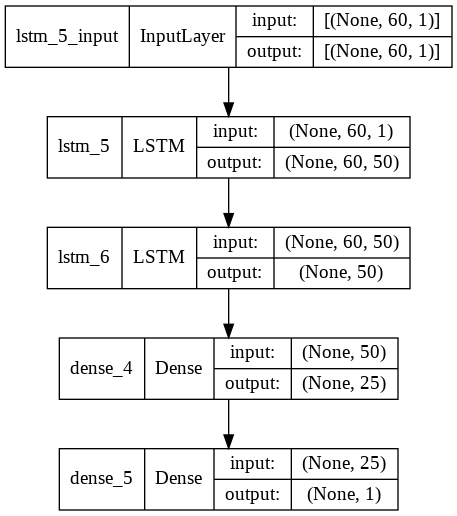

In [ ]:
model = Sequential()
model.add(LSTM(50, return_sequences=True,input_shape=(x_train.shape[1],1) ))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
plot_model(model, show_shapes=True, show_layer_names=True)


In [ ]:
#compile model
model.compile(optimizer = 'adam', loss= 'mean_squared_error')

In [ ]:
#model fit
model.fit(x_train, y_train, batch_size = 1, epochs =1)

940/940 [==============================] - 26s 28ms/step - loss: 4.8372e-04


In [ ]:
#Create the testing data set and a new array containing the data
test_data = scaled = scaled_data[training_data_len - 60: , :]
#Create the data sets x_tests andy_tests
x_test = []
y_test = dataset[training_data_len:,:]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [ ]:
#convert to array
x_test= np.array(x_test)

In [ ]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# LSTM Model 2 Predictions

In [ ]:
#Get the models predictions for prices values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [ ]:
#get the rootmean squared error (RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

5.894517707058704

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


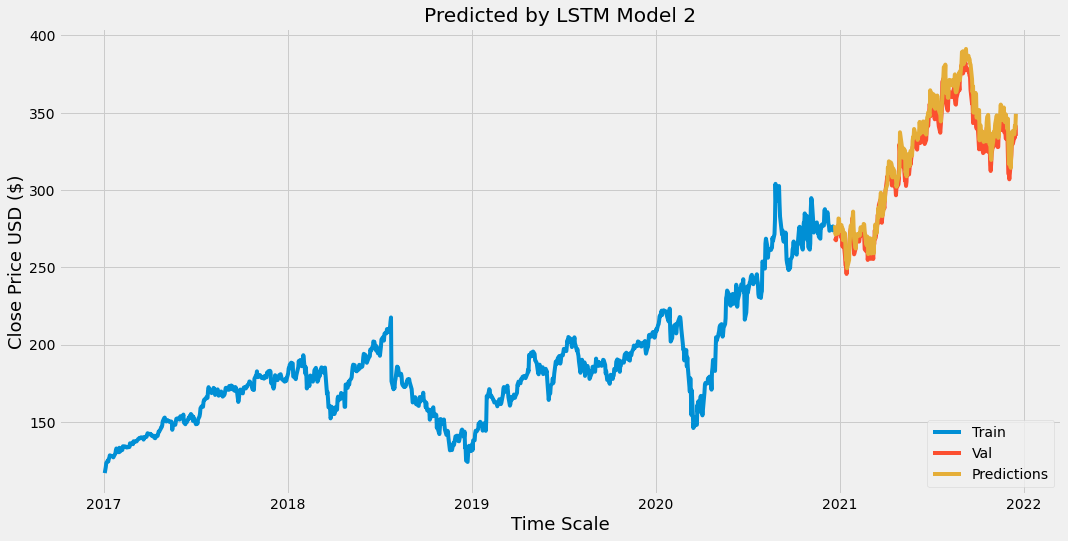

In [ ]:
#Plot the data 
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#visualize the data
plt.figure(figsize=(16,8))
plt.title('Predicted by LSTM Model 2')
plt.xlabel('Time Scale', fontsize = 18)
plt.ylabel('Close Price USD ($)', fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc = 'lower right')
plt.show()

In [ ]:
valid

,Close,Predictions
Date,,
2020-12-18,276.399994,278.946350
2020-12-21,272.790009,278.604950
2020-12-22,267.089996,278.031799
2020-12-23,268.109985,276.757935
2020-12-24,267.399994,275.450134
...,...,...
2021-12-08,330.559998,321.547028
2021-12-09,329.820007,322.355347
2021-12-10,329.750000,323.856262
